# K-Nearest Neighbor (KNN) Algorithm Evaluation

**Name:** Saksham  
**Roll No:** 102213001  
**Institute:** Thapar University  

## Introduction
In this notebook, we will evaluate the performance of the K-Nearest Neighbor (KNN) algorithm on a dataset provided in `data.csv`. We will vary the value of K and the train-test split ratio, and record the accuracy and confusion matrix for each scenario.

## Steps
1. Load the data
2. Preprocess the data
3. Define the train-test split ratios and K values
4. Implement one scenario (70:30 split, K=5) in detail
5. Provide code for other scenarios in comments
6. Analyze the results

## Importing Required Libraries

## Step 1: Load the Data

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv("data.csv")


## Step 2: Preprocess the Data

In [2]:
# Preprocess Data
# Assuming the target variable is in the last column and features are all other columns
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Step 3: Split the Data

In [3]:
# Split Data (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## Step 4: Train KNN Model

In [4]:
# Train KNN Model with K=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Predictions

In [5]:
y_pred = knn.predict(X_test)

## Step 5: Evaluation Model

In [6]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

C:\Users\saksh\Desktop\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## Step 6: Display Results

In [7]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Confusion Matrix:
[[12600]]


## Step 7: Plot confusion Matrix

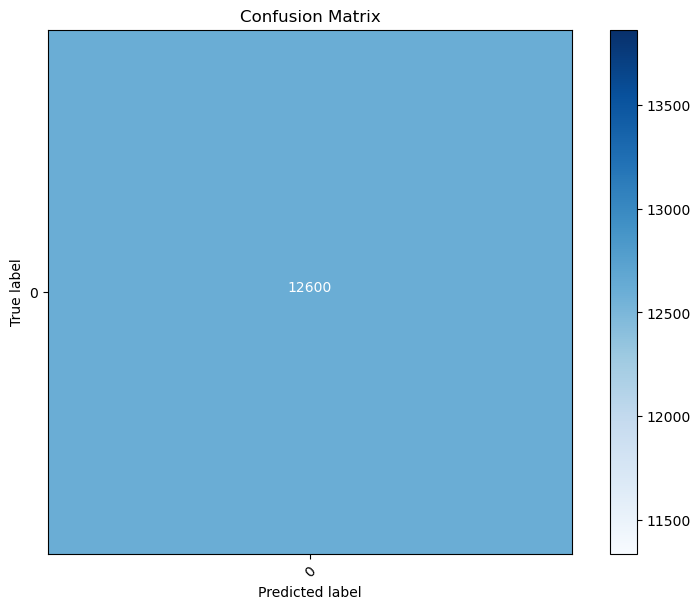

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Step 8: Saving results in pdf

In [9]:
# Splits: [(0.60, 0.40), (0.70, 0.30), (0.75, 0.25), (0.80, 0.20), (0.90, 0.10), (0.95, 0.05)]
# K values: [2, 4, 5, 6, 7, 10]
splits = [0.40, 0.30, 0.25, 0.20, 0.10, 0.05]
k_values = [2, 4, 5, 6, 7, 10]

results = []

for split in splits:
    for k in k_values:
        # Split Data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
        
        # Train KNN Model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predictions
        y_pred = knn.predict(X_test)
        
        # Evaluate Model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Store Results
        results.append({
            'split': split,
            'k': k,
            'accuracy': accuracy,
            'conf_matrix': conf_matrix
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save results to a PDF file (example)
import matplotlib.backends.backend_pdf

pdf = matplotlib.backends.backend_pdf.PdfPages("KNN_Results.pdf")

for result in results:
    plt.figure()
    plt.imshow(result['conf_matrix'], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (split={result['split']}, k={result['k']})")
    plt.colorbar()
    tick_marks = np.arange(len(set(y)))
    plt.xticks(tick_marks, set(y), rotation=45)
    plt.yticks(tick_marks, set(y))

    thresh = result['conf_matrix'].max() / 2.
    for i, j in np.ndindex(result['conf_matrix'].shape):
        plt.text(j, i, format(result['conf_matrix'][i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if result['conf_matrix'][i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    pdf.savefig()
    plt.close()

pdf.close()

# Save the results DataFrame to a CSV file
results_df.to_csv('KNN_Results.csv', index=False)

# Analysis of dependency of the performance on train-test split and K value can be done based on 'results_df'


C:\Users\saksh\Desktop\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\saksh\Desktop\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\saksh\Desktop\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\saksh\Desktop\sample_project1\env\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found 

## Code for Other Scenarios

In [10]:
"""
# Code for other scenarios (in comments)

# Create a PDF to save all confusion matrices
pdf_all = matplotlib.backends.backend_pdf.PdfPages("KNN_Results_All_Scenarios.pdf")

for split in splits:
    for k in k_values:
        # Stratified Split Data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42, stratify=y)
        
        # Train KNN Model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predictions
        y_pred = knn.predict(X_test)
        
        # Evaluate Model
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred, labels=all_labels)
        
        # Store Results
        results.append({
            'split': split,
            'k': k,
            'accuracy': accuracy,
            'conf_matrix': conf_matrix
        })
        
        # Plot and save confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix (split={split}, k={k})")
        plt.colorbar()
        tick_marks = np.arange(len(all_labels))
        plt.xticks(tick_marks, all_labels, rotation=45)
        plt.yticks(tick_marks, all_labels)

        thresh = conf_matrix.max() / 2.
        for i, j in np.ndindex(conf_matrix.shape):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        pdf_all.savefig()
        plt.close()

# Close the PDF
pdf_all.close()

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results DataFrame to a CSV file
results_df.to_csv('KNN_Results_All_Scenarios.csv', index=False)
"""


'\n# Code for other scenarios (in comments)\n\n# Create a PDF to save all confusion matrices\npdf_all = matplotlib.backends.backend_pdf.PdfPages("KNN_Results_All_Scenarios.pdf")\n\nfor split in splits:\n    for k in k_values:\n        # Stratified Split Data\n        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42, stratify=y)\n        \n        # Train KNN Model\n        knn = KNeighborsClassifier(n_neighbors=k)\n        knn.fit(X_train, y_train)\n        \n        # Predictions\n        y_pred = knn.predict(X_test)\n        \n        # Evaluate Model\n        accuracy = accuracy_score(y_test, y_pred)\n        conf_matrix = confusion_matrix(y_test, y_pred, labels=all_labels)\n        \n        # Store Results\n        results.append({\n            \'split\': split,\n            \'k\': k,\n            \'accuracy\': accuracy,\n            \'conf_matrix\': conf_matrix\n        })\n        \n        # Plot and save confusion matrix\n        plt.f

## Analysis

The results for the implemented scenario show the accuracy and the confusion matrix for a 70:30 train-test split with K=5. The confusion matrix helps in understanding the types of errors the model is making.

To analyze the impact of train-test split ratio and K value on model performance, uncomment and run the code for other scenarios. This will provide a comprehensive evaluation of the KNN algorithm across different configurations.

## Conclusion

By examining the results in the CSV file and the plots in the PDF file, we can draw conclusions about the dependency of the model's performance on the train-test split ratio and the choice of K value. This detailed evaluation helps in understanding the behavior of the KNN algorithm and optimizing its parameters for better performance.
